# Logistic Regression with statsmodels
___

It is use SAT score to predict whether a student will be admitted or not.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [3]:
# like dummies, we must convert Yes/No to 1 and 0

raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})

In [5]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [6]:
y = data['Admitted']

In [7]:
x1 = data['SAT']

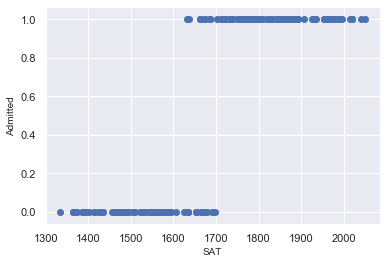

In [8]:
plt.scatter(x1, y, color = 'C0')

plt.xlabel('SAT', fontsize = 10)
plt.ylabel('Admitted', fontsize = 10)

plt.show()

#### If use the linear regression

/Users/How.Short/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


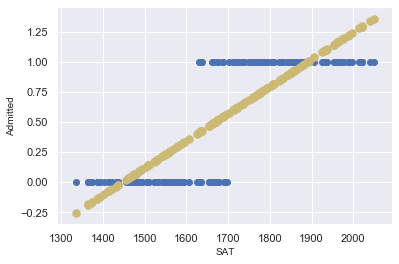

In [9]:
# not only this regression an awful fit but it also predicts values which fall outside the natural domain of admission
# this regression doesn't even know that our values are bounded between 0 and 1
# linear regression is a great predictive technique but is simply not fit for this kind of analysis
# the first assumption of linear regression is linearity, but it is violated
# because this data is non-linear, thus it must use the non-linear approach

x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
result_lin = reg_lin.fit()

plt.scatter(x1, y, color = 'C0')
y_hat = x1 * result_lin.params[1] + result_lin.params[0]

plt.scatter(x1, y_hat, lw = 2.5, color = 'C8')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('Admitted', fontsize = 10)
plt.show()

#### If use the logistic regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


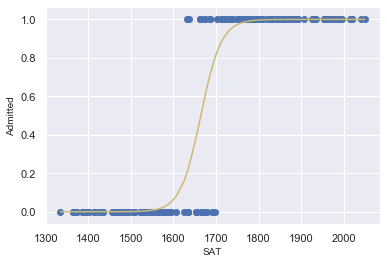

In [10]:
# optimization terminated successfully means that we managed to fit the regression
# the function value shows the value of the objective function at the 10th iteration
# there is always the possibility that after a certain number of iterations the model won't learn
# therefore it can't optimize the optimization function
# in sm the max number of iterations is 35, after 35, it will stop trying

reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))

f_sorted = np.sort(f(x1, result_log.params[0], result_log.params[1]))
x_sorted = np.sort(np.array(x1))

# it is bounded by the two outcomes 0 and 1
# this function shows the probability of admission, given an SAT score
# when SAT score is relatively low, the probability of getting admitted is 0 or 0%
# when SAT score is relatively high, the probability of getting admitted is 1 or 100%
# when SAT score is between 1600 and 1700, the probability of getting admitted is uncertain
# so there is a probability associated with it
# so this curve is logistic regression curve

plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('Admitted', fontsize = 10)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()

In [11]:
# apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [12]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.7992
Time:                        15:40:58   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### MLE (Maximum likelihood estimation)

Likelihood function, it is a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables, the bigger the likelihood function, the higher the probability that this model is correct, the MLE tries to maximize the likelihood function.

The computer is going through different values, until it finds a model, for which the likelihood is the highest, so when it can no longer improve it, it will just stop the optimization and that is also how any typical ML process goes.
___

#### Log-Likelihood

The value of Log-Likelihood is almost but not always negative, the bigger it is the better.
___

#### LL-Null (Log Likelihood-null)

The LL-Null is the Log-Likelihood of a model which has no independent variables, actually the same <code>y = β0 * 1,</code> this array is the constant we are adding with add_constant method.

You may want to compare the Log-Likelihood of model wi the LL-Null to see if this model has any explanatory power.
___

#### LLR p-value (Log Likelihood ratio p-value)

It is based on the Log-Likelihood of the model and the LL-Null, it measures if our model is statistically different from LL-Null, a.k.a. a useless model.

In this model, the LLR p-value is very low around 0.000, so it is significant.
___

#### Pseudo R-squared

There is no such thing as a clearly defined R-squared for the logistic regression, there are several propositions which have a similar meaning to the R-squared but none of them is even close to the real deal.

Some terms may have heard are AIC, BIC and McFadden's R-squared, in this model is McFadden's R-squared, according to the McFadden himself, a good Pseudo R-squared is somewhere between 0.2 and 0.4.

Moreover this measure is mostly useful for comparing variations of the same model, different models will have completely different and incomparable Pseudo R-squares.
___

#### 